<a href="https://colab.research.google.com/github/CarolineMwangi/Compiler-Construction/blob/main/Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB ACTIVITY 1: FLEX, BISON, LEX, YACC**

### **Flex(Fast Lexical Analyzer Generator):**

It is a computer program that is used for generating lexical analyzers which are used to perform pattern-matching in text. Flex automates the conversion of RE to NFA and NFA to DFA.

It happens to be more flexible than Lex and Yacc and it produces faster code.

Flex is made up of 3 sections: the definition section which contains the declaration of variables, regular definitions and manifest constants, the rules section which contains the pattern and the corresponding action and the user defined section which typically contains any valid C code.




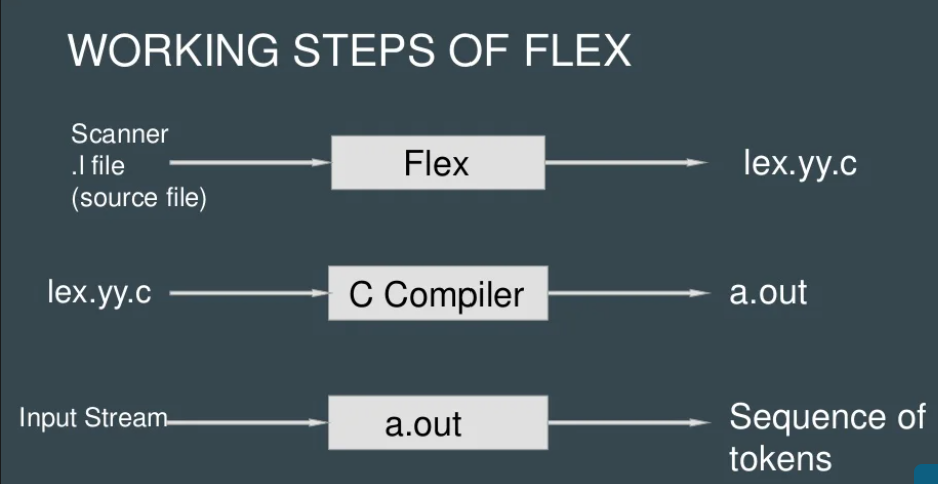

In [ ]:
# Code snippet
# Counts the number of characters and number of lines in the input
/*** Definition Section  ***/

%{
int count_lines = 0, count_chars = 0;
%}

/*** Rule Section ***/
# Rule 1:Matches any character exluding a new line.
# Rule 2: Matches a new line. 

%%
.	 ++count_chars;
\n ++count_lines; ++count_chars;

%%

/*** Code Section ***/
main()
  {
  yylex();
  printf("Number of lines = %d, Number of chars = %d\n",
         count_lines, count_chars);
  }



### **Bison:**

Bison is a general-purpose parser generator. 

Bison can be used to develop a wide range of language parsers.

It can also be used as a replacement for yacc.


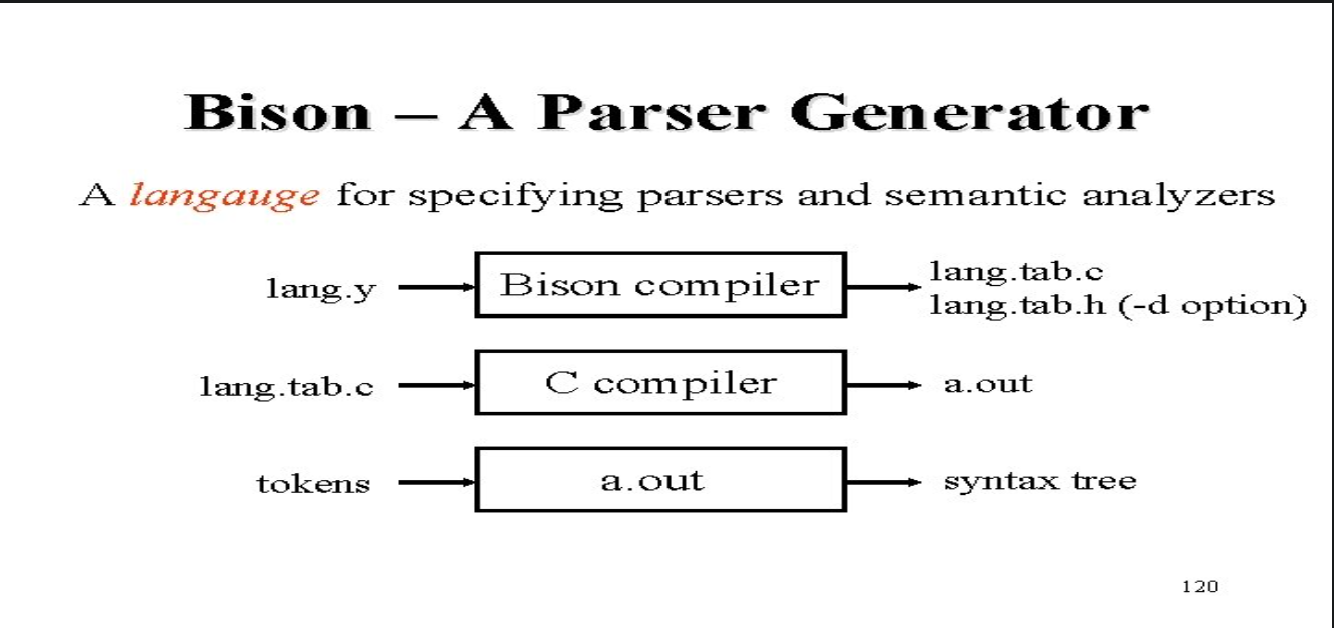

In [ ]:
# Code snippet
# C Declarations
%{
  #include <math.h>  /* For math functions, cos(), sin(), etc. */
  #include "calc.h"  /* Contains definition of `symrec`        */
%}

# Bison Declarations

%union {
  double     val;  /* For returning numbers.                   */
  symrec  *tptr;   /* For returning symbol-table pointers      */
}

%token <val>  NUM        /* Simple double precision number   */
%token <tptr> VAR FNCT   /* Variable and Function            */
%type  <val>  exp

%right '='
%left '-' '+'
%left '*' '/'
%left NEG     /* Negation--unary minus */
%right '^'    /* Exponentiation        */

# Grammar

%%
  input:   /* empty */
        | input line
  ;

  line:
            '\n'
          | exp '\n'   { printf ("\t%.10g\n", $1); }
          | error '\n' { yyerrok;                  }
  ;

  exp:      NUM                { $$ = $1;                         }
          | VAR                { $$ = $1->value.var;              }
          | VAR '=' exp        { $$ = $3; $1->value.var = $3;     }
          | FNCT '(' exp ')'   { $$ = (*($1->value.fnctptr))($3); }
          | exp '+' exp        { $$ = $1 + $3;                    }
          | exp '-' exp        { $$ = $1 - $3;                    }
          | exp '*' exp        { $$ = $1 * $3;                    }
          | exp '/' exp        { $$ = $1 / $3;                    }
          | '-' exp  %prec NEG { $$ = -$2;                        }
          | exp '^' exp        { $$ = pow ($1, $3);               }
          | '(' exp ')'        { $$ = $2;                         }
  ;

%%

# Code
# Could be any valid C code

### **Lex:**

 Lex is a program designed to generate scanners which recognize lexical patterns in text. These scanners can also be referred to as tokenizers.
  Lex was originally developed by Eric Schmidt and Mike Lesk. 

  Lex faciliates the processing of character sequences such as source code to produce symbol sequences referred to as tokens for use as input to other programs such as parsers.

  Below is a lex file that recognizes strings of numbers in the provided input and prints them out.

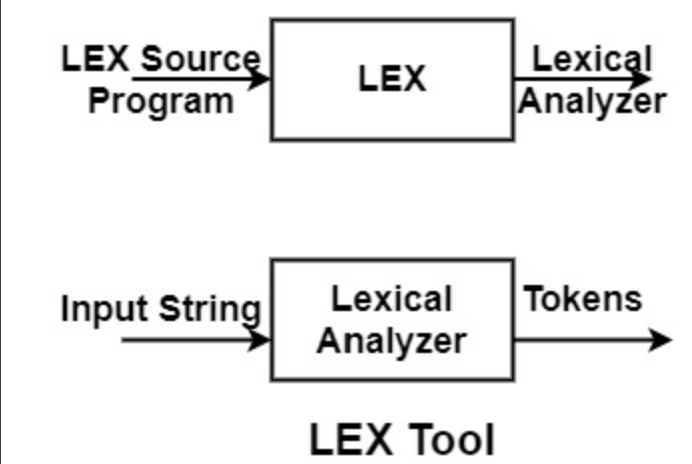

In [ ]:
# code snippet

#include <stdio.h>

%%
   
[0-9]+  {
            printf("This is an integer: %s\n", yytext);
        }

.|\n  {  }

%%

int main(void)
{
    yylex();
    return 0;
}

### **Yacc(Yet Another Compiler Compiler):**

It is a tool for constructing parsers. Yacc generates C code for a syntax analyzer.

It uses grammar rules that allow it to analyze tokens from lex and create a syntax tree.

A syntax tree imposes a hierarchical structure on tokens. For example, operator precedence and associativity are apparent in a syntax tree.
The next step, code generation, does a depth-first walk of the syntax tree to generate code, of which some compilers generate machine code while others produce assembly code.

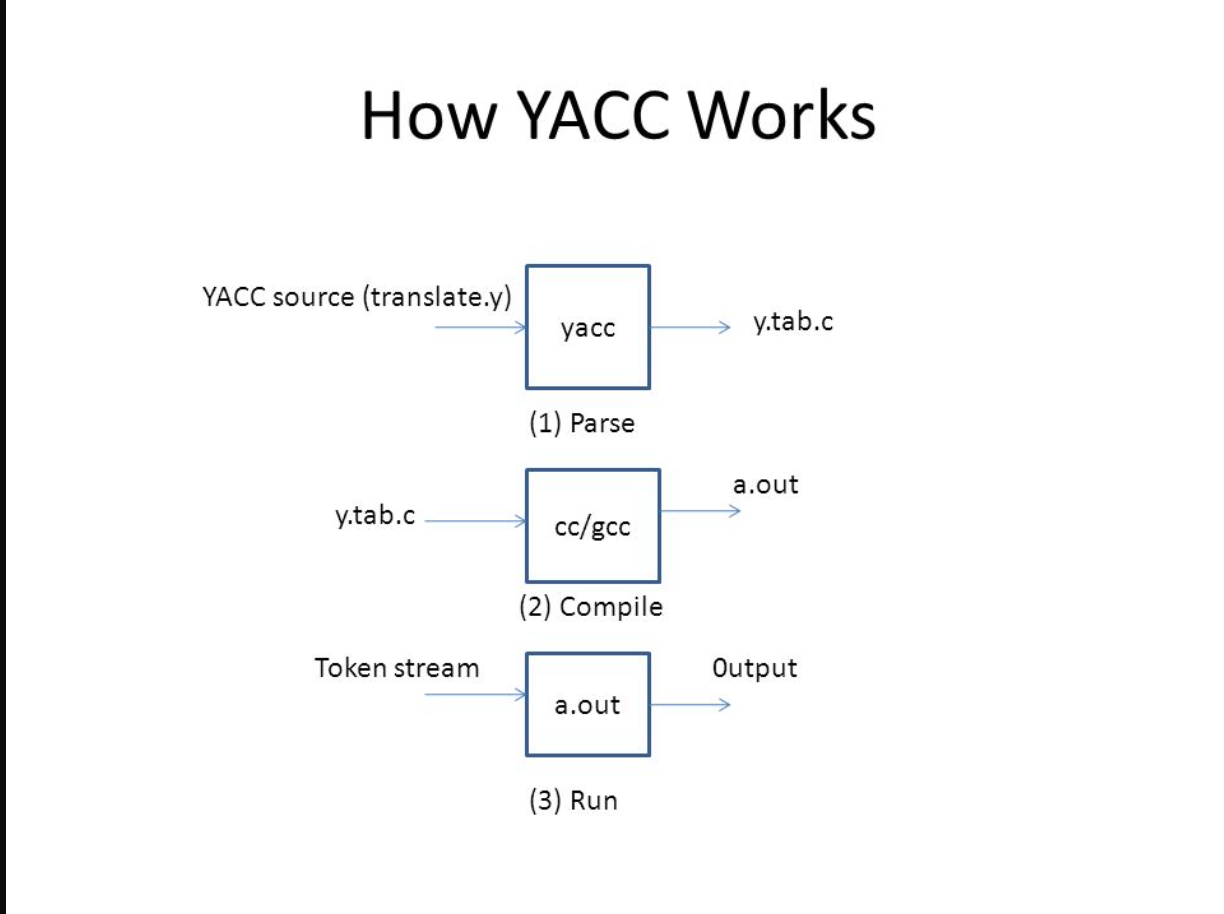

In [ ]:
# code snippet
# Recognize a valid arithmetic expression
%{
   /* Definition section */
  #include<stdio.h>
  #include "y.tab.h"
  extern int yylval;
%}
  
/* Rule Section */
%%
[0-9]+ {
          yylval=atoi(yytext);
          return NUMBER;
  
       }
[\t] ;
  
[\n] return 0;
  
. return yytext[0];
  
%%
  
int yywrap()
{
 return 1;
}

# Parser
%{
   /* Definition section */
  #include<stdio.h>
  int flag=0;
%}
  
%token NUMBER
  
%left '+' '-'
  
%left '*' '/' '%'
  
%left '(' ')'
  
/* Rule Section */
%%
  
ArithmeticExpression: E{
  
         printf("\nResult=%d\n", $$);
  
         return 0;
  
        };
 E:E'+'E {$$=$1+$3;}
  
 |E'-'E {$$=$1-$3;}
  
 |E'*'E {$$=$1*$3;}
  
 |E'/'E {$$=$1/$3;}
  
 |E'%'E {$$=$1%$3;}
  
 |'('E')' {$$=$2;}
  
 | NUMBER {$$=$1;}
  
 ;
  
%%

void main()
{
   printf("\nEnter Any Arithmetic Expression which 
                   can have operations Addition, 
                   Subtraction, Multiplication, Division, 
                          Modulus and Round brackets:\n");

   yyparse();
   if(flag==0)
   printf("\nEntered arithmetic expression is Valid\n\n");
}

void yyerror()
{
   printf("\nEntered arithmetic expression is Invalid\n\n");
   flag=1;
}

### **REFERENCES:**

Flex (Fast Lexical Analyzer Generator ). (2018, April 12). GeeksforGeeks. https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

Sandip Basnet. (12:43:59 UTC). Flex (fast lexical analyzer generator ). https://www.slideshare.net/SandipBasnet3/flex-fast-lexical-analyzer-generator

Syntax Analysis 1 Syntax Analysis Introduction to parsers. (n.d.). Retrieved September 8, 2022, from https://slidetodoc.com/syntax-analysis-1-syntax-analysis-introduction-to-parsers/

Bison command in Linux with Examples. (2019, April 15). GeeksforGeeks. https://www.geeksforgeeks.org/bison-command-in-linux-with-examples/

Levine, J. R., & Levine, J. R. (2009). Flex & bison (1st ed). O’Reilly.

Levine, J. R., Mason, T., & Brown, D. (1997). Lex & yacc (2. ed., minor corr). O’Reilly.



